In [2]:
import numpy as np
import pandas as pd
from prophet import Prophet

c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('Data/BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [5]:
# The prophet library requires to use the below column names
df.columns = ['ds','y']

In [6]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [11]:
m = Prophet()

m.fit(df)

16:15:47 - cmdstanpy - INFO - Chain [1] start processing
16:15:47 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# create placeholder to hold future predictions
future = m.make_future_dataframe(periods=24,freq='MS')

In [14]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [15]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [16]:
len(df)

324

In [17]:
len(future)

348

In [19]:
# Predict and fill in future
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.898400,1140.875385,1457.522756,1772.898400,1772.898400,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,0.0,0.0,0.0,1311.043734
1,1992-02-01,1775.730691,1183.353674,1526.202442,1775.730691,1775.730691,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,0.0,0.0,0.0,1348.171720
2,1992-03-01,1778.380254,1436.742408,1746.004738,1778.380254,1778.380254,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,0.0,0.0,0.0,1599.177870
3,1992-04-01,1781.212546,1408.664391,1741.151137,1781.212546,1781.212546,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,0.0,0.0,0.0,1584.963880
4,1992-05-01,1783.953473,1664.241762,1997.008386,1783.953473,1783.953473,45.147907,45.147907,45.147907,45.147907,45.147907,45.147907,0.0,0.0,0.0,1829.101380


In [20]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [22]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4477.023361,4787.454355,4628.441552
337,2020-02-01,4508.458841,4838.619553,4678.807340
338,2020-03-01,4797.033165,5105.876450,4942.197241
339,2020-04-01,4768.448478,5099.702321,4941.221054
340,2020-05-01,5040.360369,5362.255183,5198.169330
341,2020-06-01,5010.747901,5331.930911,5179.161700
342,2020-07-01,5146.652628,5475.985463,5311.678492
343,2020-08-01,5077.324021,5394.349340,5240.959670
344,2020-09-01,4921.076067,5237.383701,5083.866806
345,2020-10-01,5023.764697,5350.856791,5189.045546


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

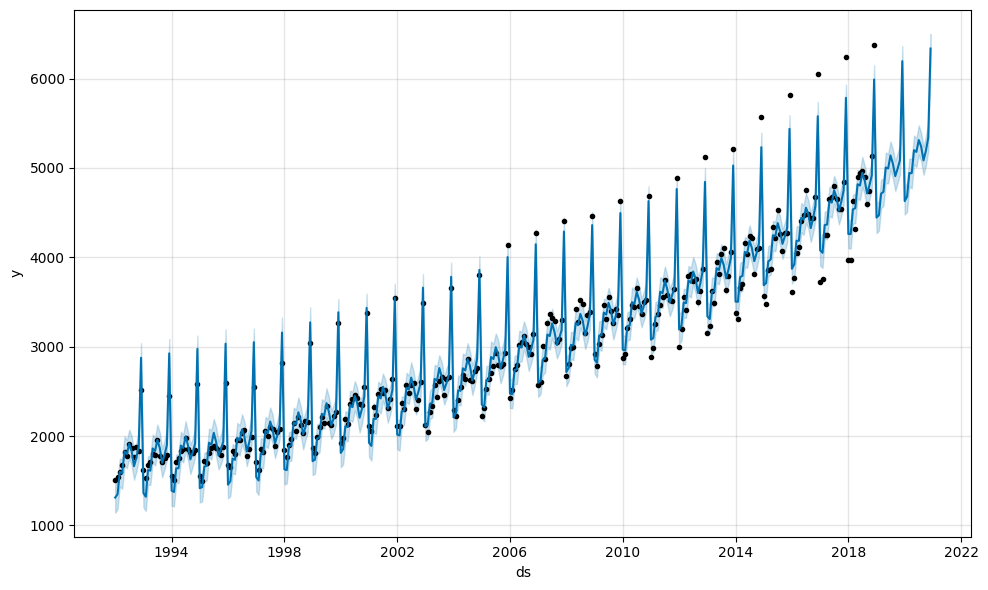

In [25]:
m.plot(forecast);

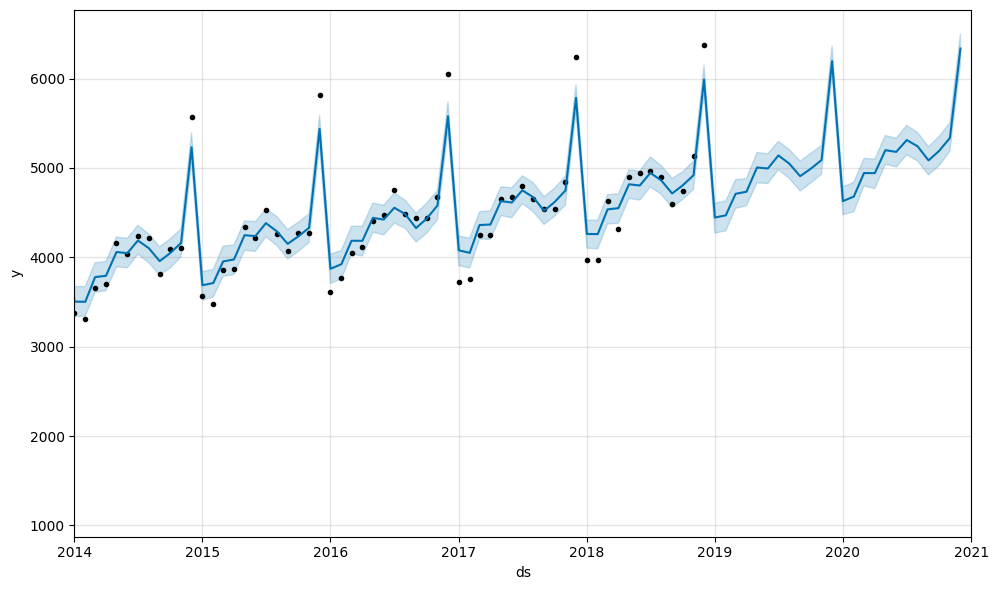

In [29]:
m.plot(forecast)
plt.xlim([pd.to_datetime('2014-01-01', format = '%Y-%m-%d'),
            pd.to_datetime('2021-01-01', format = '%Y-%m-%d')]);

<AxesSubplot:xlabel='ds'>

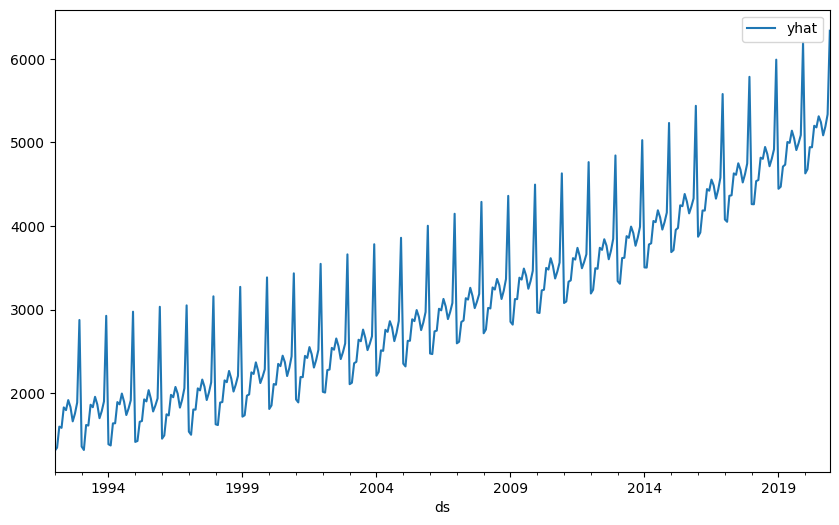

In [32]:
forecast.plot(x='ds',y='yhat',figsize=(10,6))

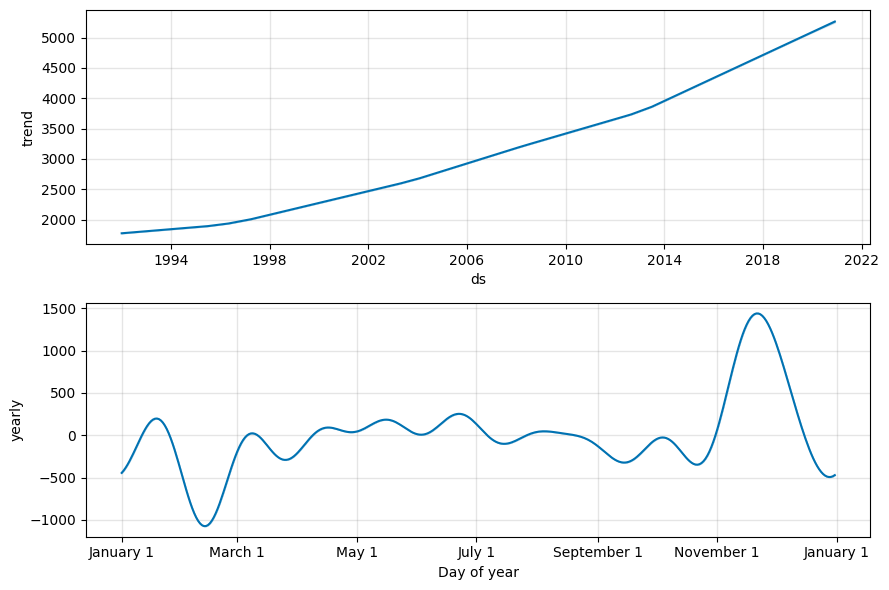

In [33]:
m.plot_components(forecast);

# Prophet Forecast Evaluations

In [34]:
df = pd.read_csv('Data/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [37]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [38]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<AxesSubplot:xlabel='ds'>

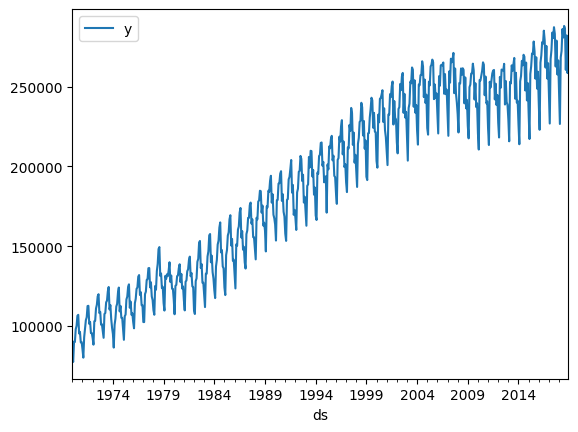

In [39]:
df.plot(x='ds',y='y')

In [40]:
len(df)

588

In [41]:
train = df.iloc[:576]
test = df.iloc[576:]

In [42]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

16:39:05 - cmdstanpy - INFO - Chain [1] start processing
16:39:06 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94489.872120,69936.961137,81677.980241,94489.872120,94489.872120,-18592.347502,-18592.347502,-18592.347502,-18592.347502,-18592.347502,-18592.347502,0.0,0.0,0.0,75897.524618
1,1970-02-01,94794.021394,61932.898648,73146.643909,94794.021394,94794.021394,-27103.444281,-27103.444281,-27103.444281,-27103.444281,-27103.444281,-27103.444281,0.0,0.0,0.0,67690.577113
2,1970-03-01,95068.736866,89226.746595,100681.887794,95068.736866,95068.736866,-27.883406,-27.883406,-27.883406,-27.883406,-27.883406,-27.883406,0.0,0.0,0.0,95040.853460
3,1970-04-01,95372.886140,89816.173450,101349.928476,95372.886140,95372.886140,31.989668,31.989668,31.989668,31.989668,31.989668,31.989668,0.0,0.0,0.0,95404.875808
4,1970-05-01,95667.224147,99510.055582,111397.499620,95667.224147,95667.224147,9618.996355,9618.996355,9618.996355,9618.996355,9618.996355,9618.996355,0.0,0.0,0.0,105286.220501


<AxesSubplot:xlabel='ds'>

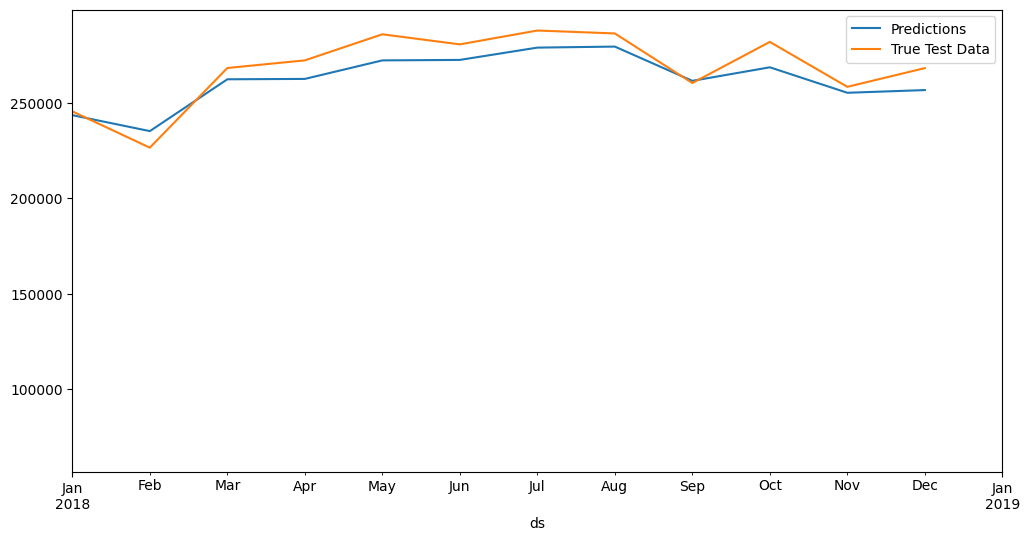

In [46]:
ax = forecast.plot(x='ds',
    y='yhat',
    label='Predictions',
    legend=True, 
    figsize=(12,6))
    
test.plot(x='ds',
    y='y',
    label = 'True Test Data',
    legend=True, 
    ax=ax, 
    xlim=('2018-01-01','2019-01-01'))

In [47]:
from statsmodels.tools.eval_measures import rmse

preds = forecast.iloc[-12:]['yhat']
preds

576    243718.687623
577    235346.300721
578    262547.147937
579    262745.730889
580    272466.972940
581    272717.536061
582    279174.637816
583    279709.182072
584    261730.808234
585    268841.651212
586    255466.144392
587    256886.892763
Name: yhat, dtype: float64

In [48]:
rmse(preds,test['y'])

8723.114585667272

In [49]:
test.mean()

c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\.venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


y    268739.666667
dtype: float64

In [50]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [51]:
# Initial period for cross val
initial = 5 * 365
initial = str(initial) + ' days'


In [52]:
initial

'1825 days'

In [53]:
# Period length for cross val
period = 5 * 365
period = str(period) + ' days'

In [54]:
# Horizon of predictions for each fold
# the horizon is how far out do we want to forecast for each period?
horizon = 365
horizon = str(horizon) + ' days'

In [55]:
df_cv = cross_validation(m,initial=initial,
            period = period,
            horizon = horizon)

  0%|          | 0/9 [00:00<?, ?it/s]16:50:01 - cmdstanpy - INFO - Chain [1] start processing
16:50:02 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 1/9 [00:01<00:08,  1.09s/it]16:50:03 - cmdstanpy - INFO - Chain [1] start processing
16:50:03 - cmdstanpy - INFO - Chain [1] done processing
 22%|██▏       | 2/9 [00:01<00:04,  1.51it/s]16:50:03 - cmdstanpy - INFO - Chain [1] start processing
16:50:03 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 3/9 [00:01<00:03,  1.88it/s]16:50:03 - cmdstanpy - INFO - Chain [1] start processing
16:50:03 - cmdstanpy - INFO - Chain [1] done processing
 44%|████▍     | 4/9 [00:02<00:02,  2.28it/s]16:50:04 - cmdstanpy - INFO - Chain [1] start processing
16:50:04 - cmdstanpy - INFO - Chain [1] done processing
 56%|█████▌    | 5/9 [00:02<00:01,  2.41it/s]16:50:04 - cmdstanpy - INFO - Chain [1] start processing
16:50:04 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 6/9 [00:02<00:01,  2.27it/s]16:50:04 - cmds

In [56]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.056712,107061.869291,109857.981683,102445.0,1976-12-11
1,1977-02-01,102996.080620,101565.508915,104397.976090,102416.0,1976-12-11
2,1977-03-01,118973.287825,117516.996981,120398.008084,119960.0,1976-12-11
3,1977-04-01,120612.896843,119105.356473,122041.375842,121513.0,1976-12-11
4,1977-05-01,127882.997333,126376.534679,129330.806078,128884.0,1976-12-11


In [57]:
len(df_cv)

108

In [58]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.392620e+07,4891.441802,4495.785193,0.027551,0.023503,0.027137,0.3
1,53 days,2.139317e+07,4625.274740,4225.237984,0.024757,0.023503,0.024464,0.3
2,54 days,1.799877e+07,4242.495209,3700.027719,0.019866,0.022254,0.019710,0.4
3,55 days,2.263701e+07,4757.836906,4206.850433,0.022844,0.023503,0.022603,0.3
4,57 days,2.060908e+07,4539.722156,3958.035585,0.021211,0.022254,0.021007,0.4
...,...,...,...,...,...,...,...,...
94,360 days,1.815642e+07,4261.035516,3740.132970,0.019540,0.019440,0.019550,0.5
95,361 days,1.727838e+07,4156.726773,3460.297498,0.018146,0.018944,0.018166,0.5
96,362 days,3.151940e+07,5614.213845,4379.294087,0.021916,0.024308,0.021817,0.4
97,364 days,2.970923e+07,5450.617688,4208.599878,0.021275,0.021428,0.021190,0.5


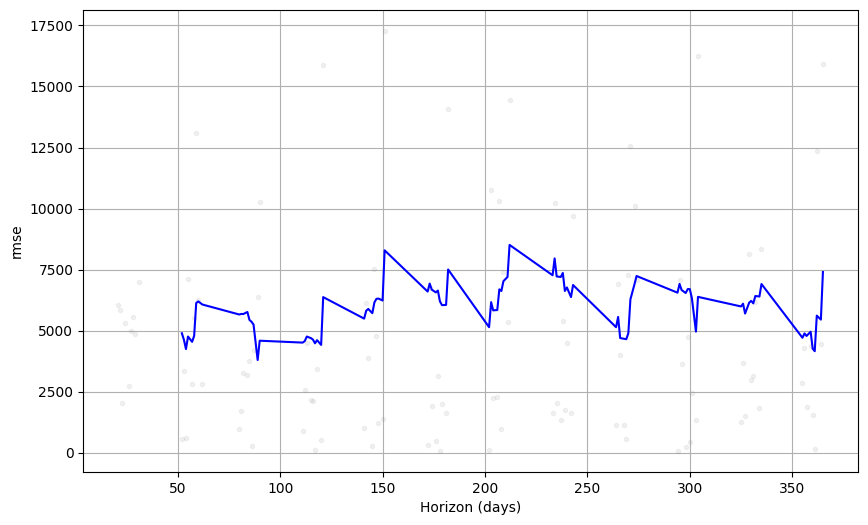

In [60]:
plot_cross_validation_metric(df_cv,
                metric='rmse');

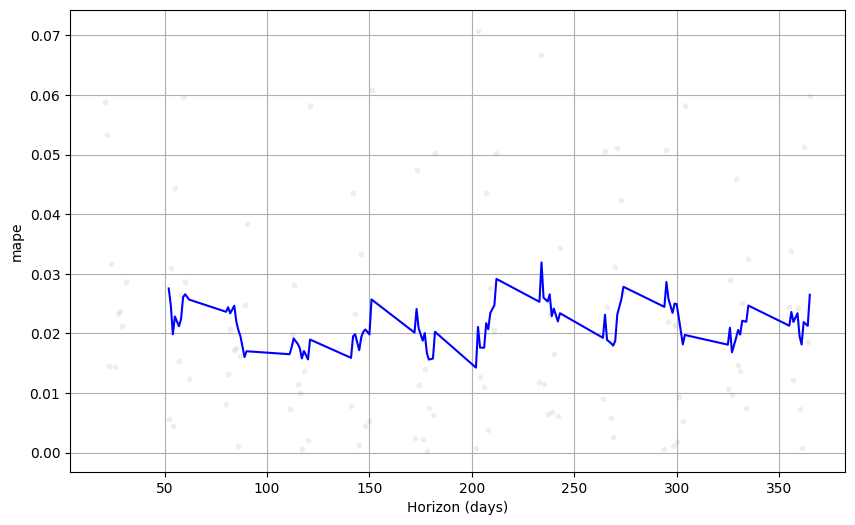

In [61]:
plot_cross_validation_metric(df_cv,
                metric='mape');

# Facebook Prophet Trend

In [62]:
df = pd.read_csv('Data/HospitalityEmployees.csv')
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [63]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

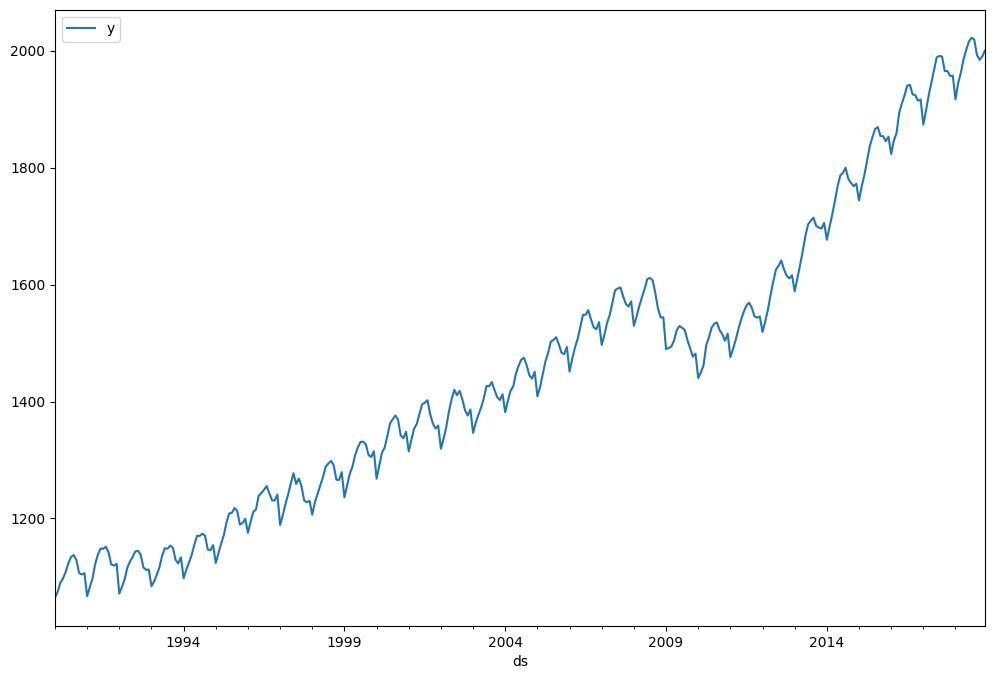

In [64]:
df.plot(x='ds',y='y',figsize=(12,8))

In [65]:
m = Prophet()

m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

16:57:47 - cmdstanpy - INFO - Chain [1] start processing
16:57:47 - cmdstanpy - INFO - Chain [1] done processing


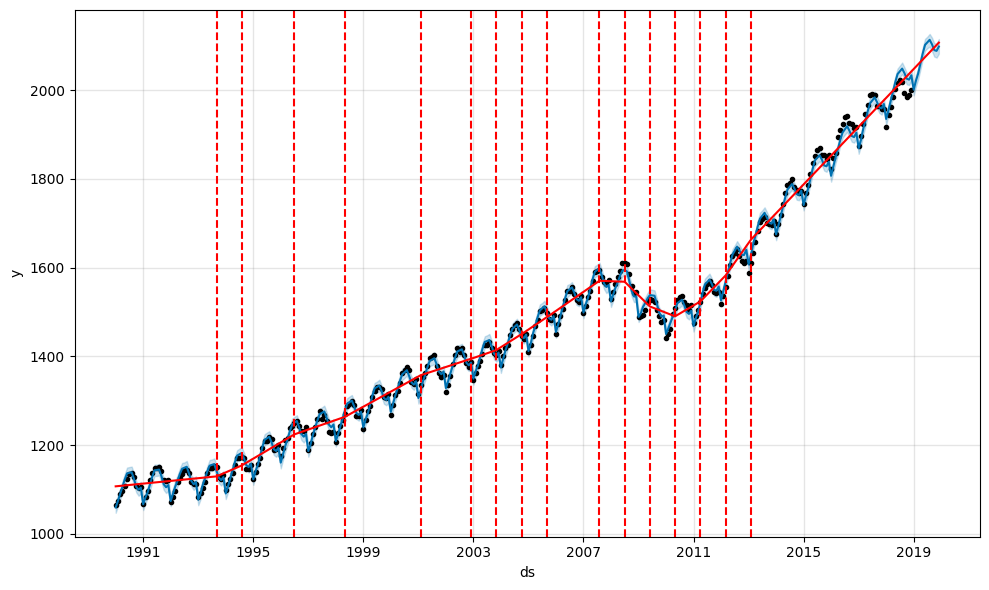

In [66]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

# Facebook Prophet Changing Seasonality

In [67]:
df = pd.read_csv('Data/airline_passengers.csv')

In [68]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

17:03:00 - cmdstanpy - INFO - Chain [1] start processing
17:03:00 - cmdstanpy - INFO - Chain [1] done processing


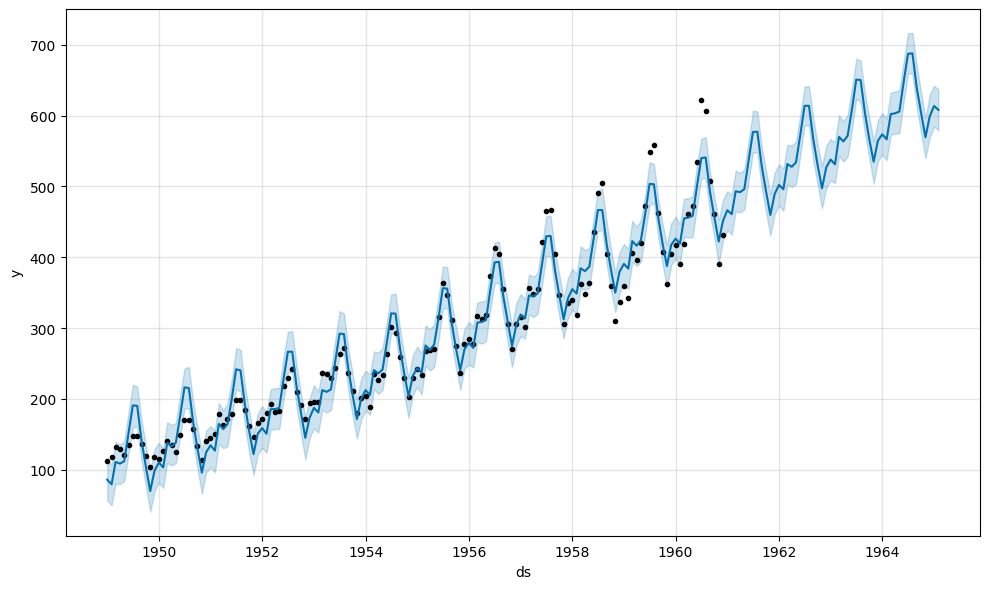

In [69]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

So the TIME series here, we can clearly see has some sort of yearly cycle.

But the seasonality in the forecast that we have up here is probably too large at the start of the Time series and too small at the end.

So again, in this Time series, the seasonality is doesn't look to be a constant additive factor as the default assumed by prophet.

Rather, it grows with the trend. So this is multiplicative seasonality.

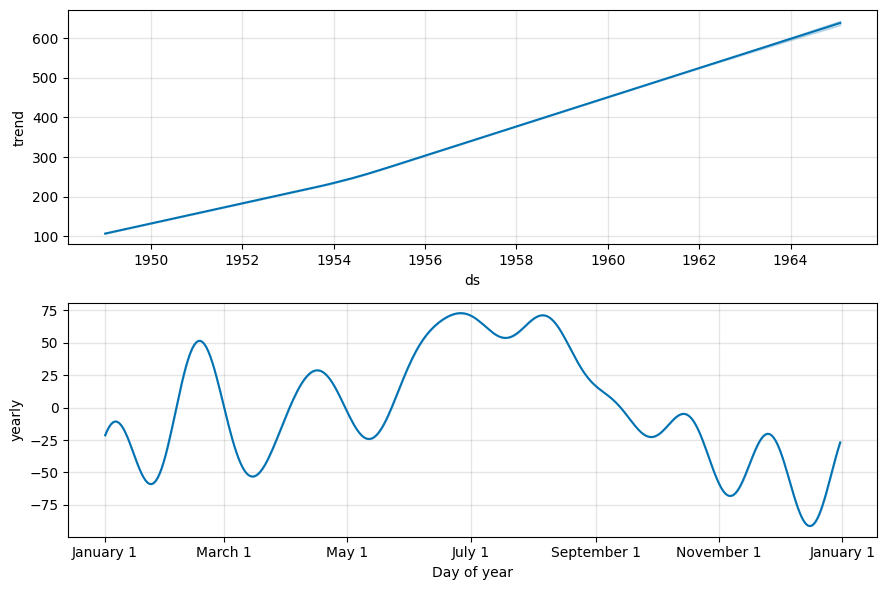

In [71]:
fig = m.plot_components(forecast);

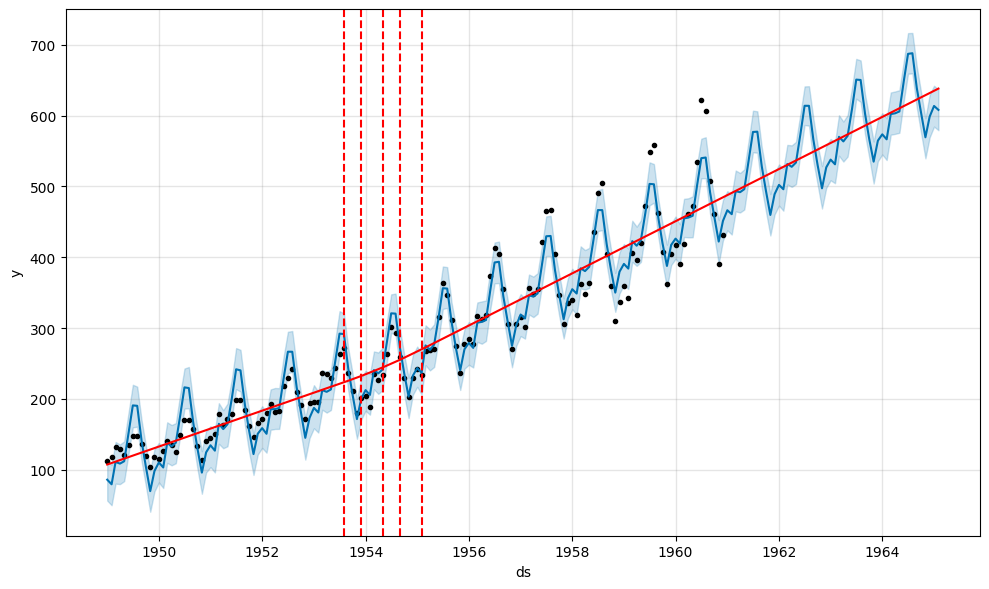

In [72]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

Change our seasonality mode to multiplicative and see how that works.

17:07:32 - cmdstanpy - INFO - Chain [1] start processing
17:07:32 - cmdstanpy - INFO - Chain [1] done processing


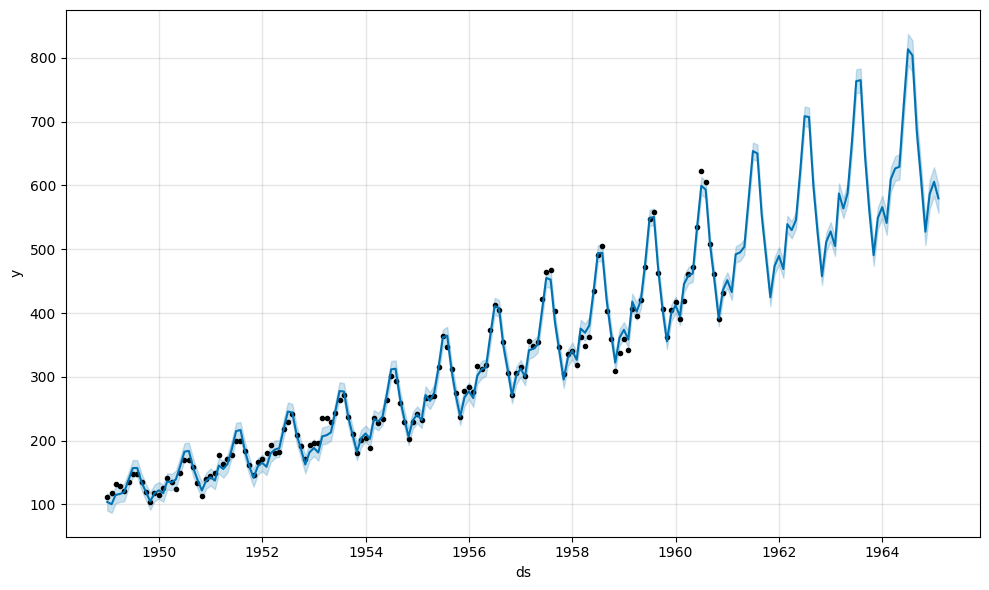

In [73]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

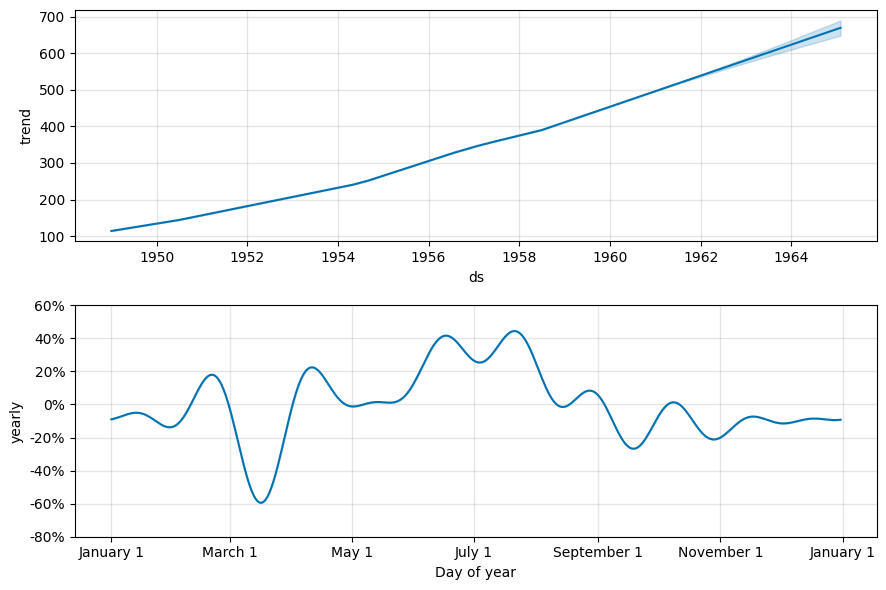

In [74]:
fig = m.plot_components(forecast);